## Оглавление

[1. Открытие файла с данными и изучение общей информации](#intro)

[2. Предобработка данных](#intro1)

  - [2.1 Стиль заголовков](#intro2)
  - [2.2 Обработка пропусков  и замена типа данных](#intro3)
  - [2.3 Обработка дубликатов](#intro4)

[3. Расчёты и добавление результатов в таблицу](#intro5)

[4. Исследовательский анализ данных](#intro6)

  - [4.1 Исследование количества игр по годам](#intro7)
  - [4.2 Исследование продаж по платформам](#intro8)
  - [4.3 Исследование продаж по платформам за актуальный период](#intro9)

[5. Составление портрета пользователя каждого региона](#intro10)

[6. Проверка гипотез](#intro11)

[7. Общий вывод](#intro12)

# Анализ компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
Для  интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные до 2016 года.  
Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Задача. 
Выявить закономерности, определяющие успешность игры и отработать принцип работы с данными.


## 1. Открытие файла с данными и изучение общей информации               <a id='intro'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('games.csv')

Выведем первые 5 строк датасета `df`

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим общую информацию о данных в датасете `df`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов. Есть такие типы данных как: `float64` и `object`.Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Согласно документации к данным:
- `Name` — название игры 
- `Platform` — платформа 
- `Year_of_Release` — год выпуска 
- `Genre` — жанр игры 
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий) 
- `EU_sales` — продажи в Европе (миллионы проданных копий) 
- `JP_sales` — продажи в Японии (миллионы проданных копий) 
- `Other_sales` — продажи в других странах (миллионы проданных копий) 
- `Critic_Score` — оценка критиков (максимум 100) 
- `User_Score` — оценка пользователей (максимум 10) 
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

Посмотрим нет ли в данных артефактов с помощью метода `describe()`

In [5]:
df.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


В столбце `User_Score`- оценка пользователей обнаружено строковое значение `tbd`, один из вариантов расшифровки которого обозначает как - 'будет определено позднее'. Этот столбец имеет строковый тип данных, хотя содержит оценки, которые логичнее хранить в других типах танных. С обработкой этого столбца будем разбираться в предообработке данных. 

### Вывод

В каждой строке исследуемой нами таблицы — данные о продажах игр, годов релиза, оценки пользователей и экспертов, жанры и платформы.

Предварительно можно утверждать, что, данных достаточно для нашего исследования. Но встречаются пропуски в данных и артефакты, с которыми в дальнейшем мы проведем работу для того чтобы проводить наше исследование.

## 2. Предобработка данных                                                                <a id='intro1'></a>   

### 2.1 Стиль заголовков                                                                                                       <a id='intro2'></a>

С помощью атрибута `columns` посмотрим названия колонок таблицы.

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведем названия в соответствие с хорошим стилем, все символы сделаем строчными с помощью метода `str.lower()`

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Обработка пропусков  и замена типа данных                                                 <a id='intro3'></a>

Выше мы выяснили, что у нас имеются пропуски в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.  

Поcмотрим какие пропуски находятся в этих столбцах.Попробуем это выяснить с помощью метода `isna()`. Этот метод выводит пропуски типа `NaN`.

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Итак, пропуски в столбцах оказались пропусками типа `NaN`. Т.к. доля строк с пропусками в столбце `name` очевидно совсем мала(сильно меньше принятого порога в 5%) строки с пропусками в этом столбце можно удалить. Сделаем это с помощью метода `dropna()`.Посмотрим оставшиеся пропуски датасета.

In [9]:
df = df.dropna(subset=['name']).reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Теперь посчитаем долю строк с пропусками в столбце `year_of_release`     

In [10]:
len(df.loc[df['year_of_release'].isna()]) / len(df)

0.016095255190570215

Т.к. доля строк с пропусками в столбце `year_of_release` составляет менее 5% - 1.6% строки с пропусками в этом столбце можно удалить, много данных при этом мы не потеряем. Сделаем это с помощью метода `dropna()`.Посмотрим оставшиеся пропуски датасета.

In [11]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Теперь посмотрим столбец `user_score` - оценка пользователей. Ранее мы выяснили, что наряду с пропусками в столбце присутствуют строки со значением `tbd`('будет определено позднее'). Судя по всему эта оценка не была определена из за недостаточности данных. Заменим пока это значение на `NaN`.

In [12]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

Посмотрим пропуски.

In [13]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Посмотрим общую информацию о данных в датасете `df`

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для дальнейшей предобработки проведем замену типа данных в столбцах `year_of_release` и `user_score`. С помощью метода `astype` выполним замену типов данных в столбцах.         

In [15]:
df = df.astype({'year_of_release':'int16',
                    'user_score':'float32'}) 

Посмотрим как изменились типы данных в столбцах.

In [16]:
df.dtypes

name                object
platform            object
year_of_release      int16
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float32
rating              object
dtype: object

Далее подумаем, как мы могли бы заполнить пропуски в столбцах `critic_score`, `user_score`, `rating`. В столбцах оценок критиков можно было бы попробовать заполнить хотя бы часть пропусков используя данные столбца оценок пользователей и наоборот, но такая замена будет сильно некорректной так как оценки пользователей и критиков по играм достаточно субъективны и могут сильно различаться. Оставим пропуски на месте, данных для их замены нет.  
В столбце `rating` заменим пропуски на так называемую 'заглушку'. Так, при дальнейшем анализе мы будем учитывать эти данные тоже.          

In [17]:
df.rating = df.rating.fillna('unknown')

**Вывод**

В данных мы обнаружили пропуски типа `NaN`. Пропуски в таблицы могут быть по разным причинам: в столбцах с оценками пропуски могут быть из за недостатка данных для формирования оценок, в столбце с рейтингом возраста из за того что этот рейтинг в разные годы обновлялся. Где то также могут быть технические ошибки, где система допустила пропуски. Из за отстутствия данных, подходящих для замены пропусков, большинство пропусков мы оставили на месте.  
Для более удобных расчетов в наших исследованиях мы изменили тип данных в некоторых столбцах.

### 2.3 Обработка дубликатов                                                                            <a id='intro4'></a>

Подсчитаем количество строк-дубликатов датасета `df`. 

In [18]:
df.duplicated().sum()

0

Выведем первые 5 строк таблицы `df`

In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


Посмотрим столбец `platform` на предмет неявных дубликатов с помощью метода `value_counts()`

In [20]:
df.platform.value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Посмотрим столбец `genre` на предмет неявных дубликатов с помощью метода `value_counts()`

In [21]:
df.genre.value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

**Вывод**

Предобработка не обнаружила дубликаты.

## 3. Расчеты и добавление результатов в таблицу                           <a id='intro5'></a>

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.  
Для этого создадим функцию, которая будет считать сумму продаж, далее с помощью метода `apply()` создадим отдельный столбец.

In [22]:
def sum_sales(row):
    sum = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
    return sum

df['total_sales'] = df.apply(sum_sales, axis=1)

Выведем первые 5 строк таблицы 

In [23]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## 4. Исследовательский анализ данных                                           <a id='intro6'></a>   

### 4.1 Исследование количества игр по годам                                                <a id='intro7'></a>

Посмотрим сколько игр выпускалось в разные годы. Важны ли данные за все периоды.

Для этого сгруппируем датасет с помощью `groupby()` по году релиза игры, методом `agg()` посчитаем количество выпущенных игр по годам, построим график с помощью метода `plot` и посмотрим распределение количества выпущенных игр по годам.

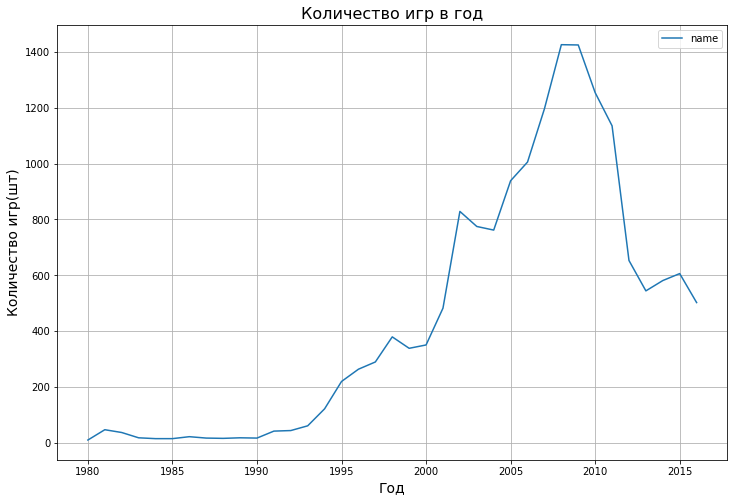

In [24]:
df.groupby('year_of_release', as_index=False).\
agg({'name': 'count'}).\
plot(x='year_of_release', y='name', grid=True, figsize=(12, 8))
plt.title('Количество игр в год', fontsize=16)
plt.xlabel('Год', fontsize=14)   
plt.ylabel('Количество игр(шт)', fontsize=14);

На графике видим что количество выпущенных игр неуклонно росло с 80х годов прошлого столетия до конца 2000х годов нынешнего столетия. С 2007 года рост остановился и после 2008го года количество выпущенных игр начало резко снижаться. Это можно попробовать объяснить увеличением игр на ПК и появлением игр на мобильных устройствах.

До 2000го года объем продаж совсем мал, основной объем продаж начинается с 2005го года. Будем учитывать эти данные в дальнейшем.

**Вывод**

Количество выпущенных игр показывало рост с 80х годов прошлого столетия до конца 2000х годов прошлого столетия. С 2007-2008го годов пошел постоянный спад выпускаемых игр. Причин может быть несколько, это и развитие индустрии игр на ПК и на мобильных устройствах.

### 4.2 Исследование продаж по платформам                                               <a id='intro8'></a>

Посмотрим как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы.

 Для этого сгруппируем датасет с помощью `groupby()` по платформам и с помощью метода `agg()` посчитаем сумму продаж. Датасет сразу же отсортируем по возрастанию суммы продаж.

In [25]:
df_platform_sales = df.groupby('platform', as_index=False).agg({'total_sales': 'sum'}).sort_values(by='total_sales')

Выведем первые 5 строк полученной таблицы.

In [26]:
df_platform_sales.head()

,platform,total_sales
14,PCFX,0.03
9,GG,0.04
1,3DO,0.10
24,TG16,0.16
25,WS,1.42


Построим столбчатую диаграмму с помощью `plot` и посмотрим распределение продаж по платформам.

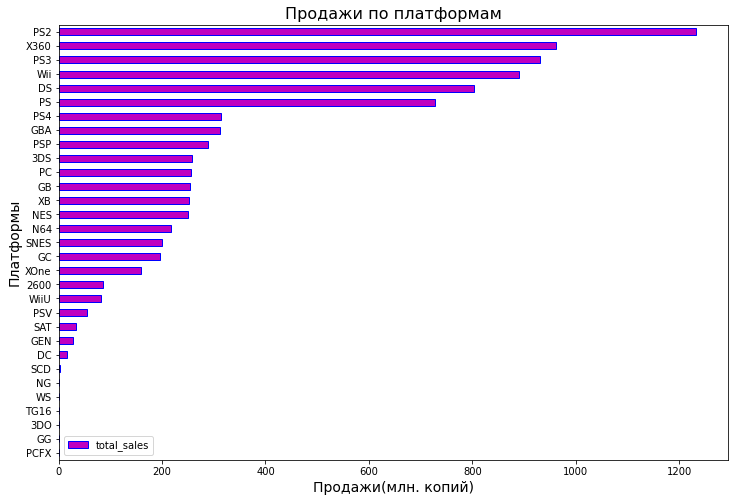

In [27]:
df_platform_sales.plot(x='platform', y='total_sales', kind='barh', figsize=(12, 8), color='m', ec='b')
plt.title('Продажи по платформам', fontsize=16)
plt.xlabel('Продажи(млн. копий)', fontsize=14)   
plt.ylabel('Платформы', fontsize=14);

На графике видим что максимальные продажи имеют платформы PS2, X360, PS3, Wii, DS, PS. Две наиболее продаваемые платформы это PS2 и X360.

Посмотрим долю от общих продаж платформ PS2 и X360.

In [28]:
df_platform_sales.query('platform == "PS2"').total_sales.sum() / df_platform_sales.total_sales.sum()

0.1399487427916

In [29]:
df_platform_sales.query('platform == "X360"').total_sales.sum() / df_platform_sales.total_sales.sum()

0.10905373838402553

Далее сгруппируем данные по платформам и году релиза, посчитаем сумму продаж за год.

In [30]:
df_sales_year = df.groupby(['platform','year_of_release'], as_index=False).agg({'total_sales': 'sum'})
df_sales_year.head()

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


С помощью цикла построим график на котором будет изображено количество продаж в год по нашим самым продаваемым платформам. 

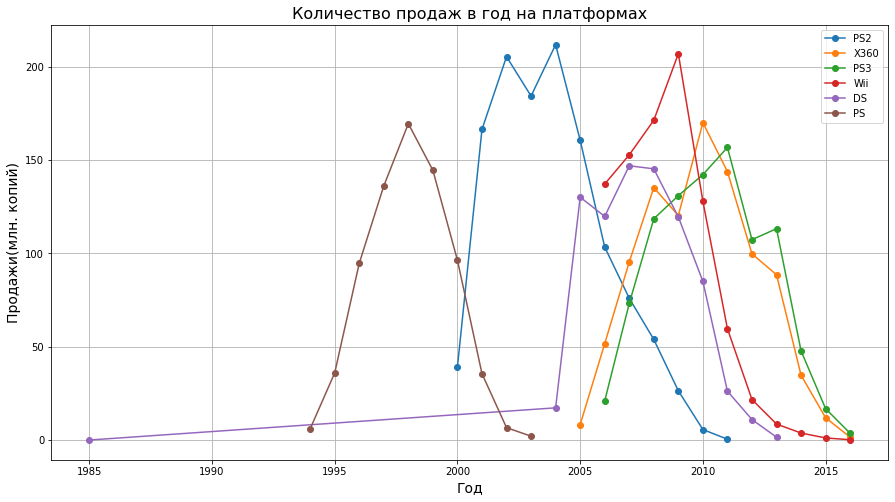

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))
for platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    df_top = df_sales_year.query('platform == @platform')
    x = df_top['year_of_release']
    y = df_top['total_sales']
    ax.plot(x, y, marker = 'o', label=platform)
    plt.legend()
plt.title('Количество продаж в год на платформах', fontsize=16)
plt.xlabel('Год', fontsize=14)   
plt.ylabel('Продажи(млн. копий)', fontsize=14);
plt.grid(True)
plt.show()

На графике видно что 'время жизни' платформы составляет около десяти лет. Это время примерно делится поровну. Первые 5 лет после появления платформы продажи растут, достигают пика, затем начинают снижаться. 

**Вывод**

Мы обнаружили что максимальные продажи имеют платформы PS2, X360, PS3, Wii, DS, PS. Две наиболее продаваемые платформы это PS2 и X360, их доли в общей сумме продаж это 14% и почти 11% соответственно. Время жизни платформы составляет около 10ти лет. Первые 5 лет платформа показывает рост, затем последующие 5 лет происходит постепенное падение падение продаж до нуля. В серии PS каждое следующее поколение выходит где то раз в 6 лет.

### 4.3 Исследование продаж по платформам за актуальный период                       <a id='intro9'></a>

Возьмем данные за соответствующий актуальный период.  Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
Посмотрим какие платформы лидируют по продажам, растут или падают за актуальный период. Выберим несколько потенциально прибыльных платформ.

Выше мы выяснили что доля продаж до 2000го года мала и эти данные можно не учитывать, также на графиках распределения продаж игр топ-5 популярных платформ мы увидели что период жизни платформы составляет около 10 лет. 2010-2011й годы были пиковыми годами в продажах для платформ PS3 и XBox360. В последующие годы вышли следующие поколения этих платформ. Соответственно для составления прогноза продаж на 2017 год целесообразно будет взять данные за последние 3 года. В этот период будут входить данные по наиболее актуальным и перспективным платформам. Что нам и требуется. 

Сделаем срез данных c 2013го года.

In [32]:
df = df.query('year_of_release > 2012')

Теперь нарисуем график продаж игр по платформам в этом периоде. Далее сгруппируем данные по платформам и году релиза, посчитаем сумму продаж за год. Выведем первые 5 строк.

In [33]:
df_sales = df.groupby(['platform','year_of_release'], as_index=False).agg({'total_sales': 'sum'})
df_sales.head()

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54


С помощью цикла построим график на котором будет изображено количество продаж в год по платформам. 

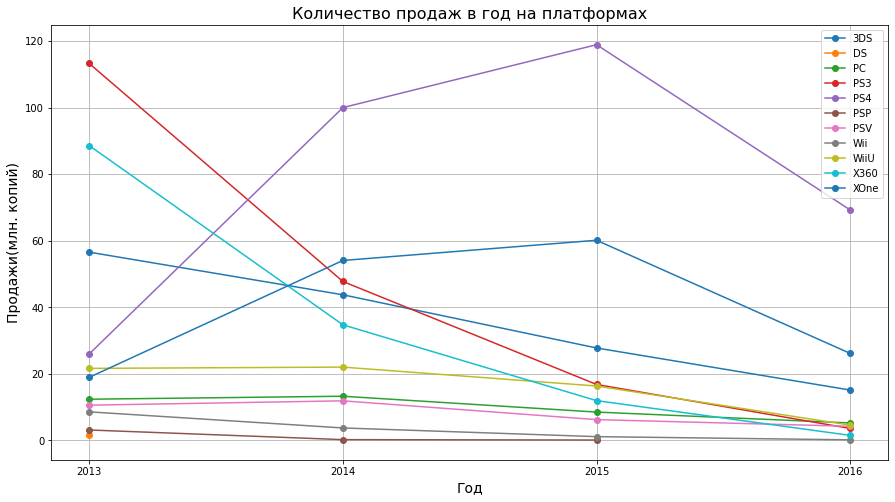

In [34]:
fig, ax = plt.subplots(figsize=(15, 8))
for platform in (df_sales['platform'].unique()):
    df_platform = df_sales.query('platform == @platform')
    x = df_platform['year_of_release']
    y = df_platform['total_sales']
    ax.plot(x, y, marker = 'o', label=platform)
    plt.legend()
plt.xticks(np.arange(2013, 2017, step=1))
plt.title('Количество продаж в год на платформах', fontsize=16)
plt.xlabel('Год', fontsize=14)   
plt.ylabel('Продажи(млн. копий)', fontsize=14);
plt.grid(True)
plt.show()

Учтем что данные за 2016 год неполные.
На графике видим:
- спад продаж прошлых поколений платформ PlayStation, XBox. Время жизни PS3 и X360 постепенно заканчивается
- выход в 2013 году новых поколений платформ PS4 и XBOxOne и постепенный рост их продаж
- продажи платформы 3DS от компании Nintendo достаточно высоки но показывают постепенное падение

На этом этапе оставим платформы, с хорошим потенциалом продаж и незаконченным жизненным циклом. Это платформы - 3DS, PC, PS4, PSV, WiiU, Xone. По этим платформам проведем дальнейший анализ.

In [35]:
df = df[df.platform.isin(['3DS', 'PC', 'PS4', 'PSV', 'WiiU', 'XOne'])]

Построим график «ящик с усами» по глобальным продажам игр в разбивке по
платформам.

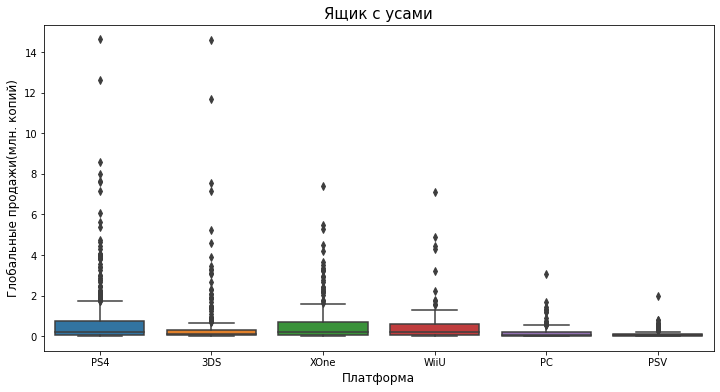

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи(млн. копий)',fontsize=12);

Еще раз построим график «ящик с усами» по глобальным продажам игр в разбивке по
платформам ограничив диапазон по вертикали.

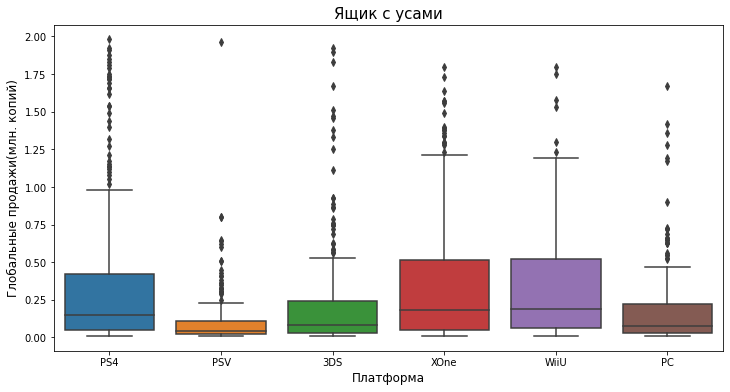

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.query('total_sales < 2'), x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи(млн. копий)',fontsize=12);

In [38]:
def median_sales(platform):
    print('Медиана продаж игр на платформе {} равна: {} млн. копий'.\
          format(platform, df.query("platform == @platform")['total_sales'].median()))
    
for platform in ['PS4', 'WiiU', 'XOne']:
    platform = median_sales(platform)

Медиана продаж игр на платформе PS4 равна: 0.2 млн. копий
Медиана продаж игр на платформе WiiU равна: 0.2 млн. копий
Медиана продаж игр на платформе XOne равна: 0.22 млн. копий


На данных видим что наибольшие медианы у трех платформ: PS4, WiiU, XOne, они практически равны и составляют 200 000 копий.  
Почти у всех платформ много выбросов, резко выбивающихся значений от всех остальных значений. Это значит присутствует много игр с выбивающимся количеством продаж, игр которые 'выстрелили'.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Создадим срез данных для платформы `PS4`

In [39]:
df_ps4 = df.query('platform == "PS4"')

С помощью графика `scatter` в методе `plot()` посмотрим взаимосвязь между продажами и отзывами пользователей и критиков. 

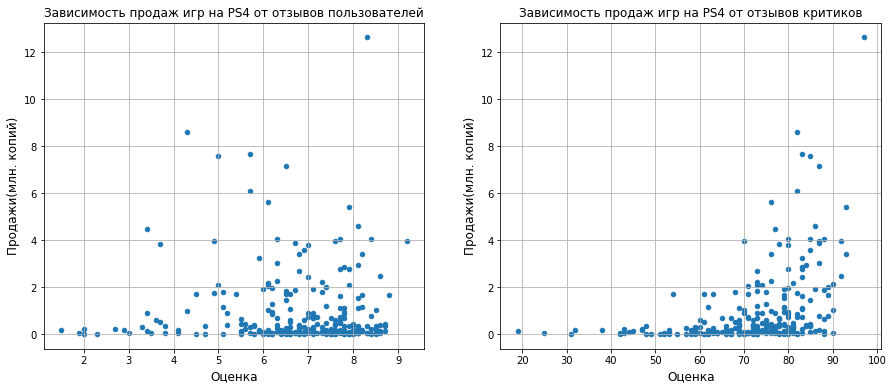

In [40]:
fig, axes = plt.subplots(1,2,figsize=(15,6))

df_ps4.plot(x='user_score', y='total_sales', kind='scatter', grid=True, ax=axes[0])
df_ps4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, ax=axes[1])
axes[0].set_title('Зависимость продаж игр на PS4 от отзывов пользователей')
axes[0].set_xlabel('Оценка', fontsize=12)
axes[0].set_ylabel('Продажи(млн. копий)', fontsize=12)
axes[1].set_title('Зависимость продаж игр на PS4 от отзывов критиков')
axes[1].set_xlabel('Оценка', fontsize=12)
axes[1].set_ylabel('Продажи(млн. копий)', fontsize=12);


Посчитаем коэффициент корелляции Пирсона

In [41]:
print(f'''Коэффициент корелляции между количеством продаж игр
и оценкой пользователей: {df_ps4['user_score'].corr(df_ps4['total_sales'])}''')
print(f'''Коэффициент корелляции между количеством продаж игр
и оценкой пользователей: {df_ps4['critic_score'].corr(df_ps4['total_sales'])}''')


Коэффициент корелляции между количеством продаж игр
и оценкой пользователей: -0.0319571090051883
Коэффициент корелляции между количеством продаж игр
и оценкой пользователей: 0.40656790206178095


Исследование показало, что присутствует некоторая положительная взаимосвязь между оценками критиков и количеством продаж игр на PS4, чем лучше оценка за игру, тем выше продажи, но слишком сильно полагаться на это не стоит, так как все же коэффициент корреляции невысок: 0,4.
Взаимосвязь между количеством продаж и оценкой пользователей отсутствует. Видимо потенциальные покупатели игр не верят таким оценкам как оценкам критиков.

Теперь исследуем зависимости продаж игр от оценок пользователей и критиков на других платформах. С помощью цикла будем строить графики `scatter` в методе `plot()` и смотреть взаимосвязь между продажами и отзывами пользователей и критиков.

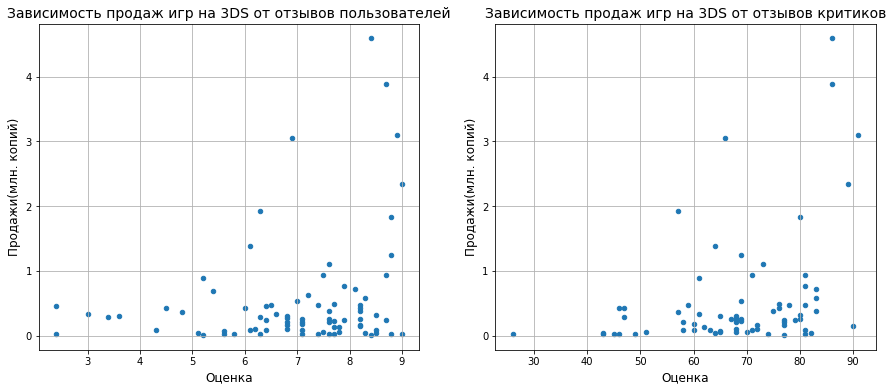

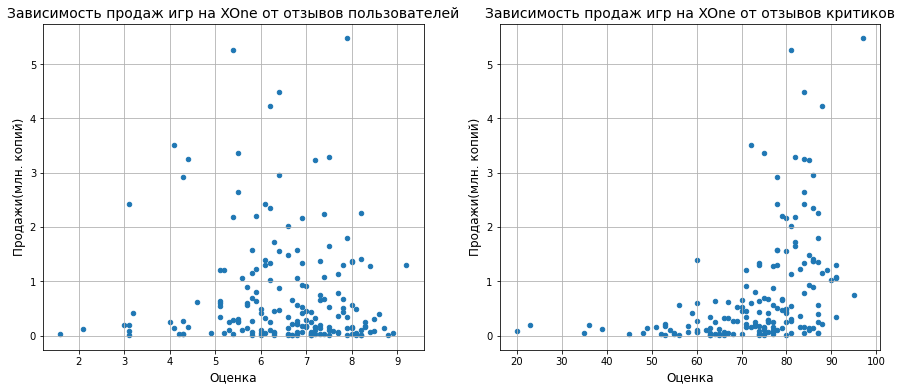

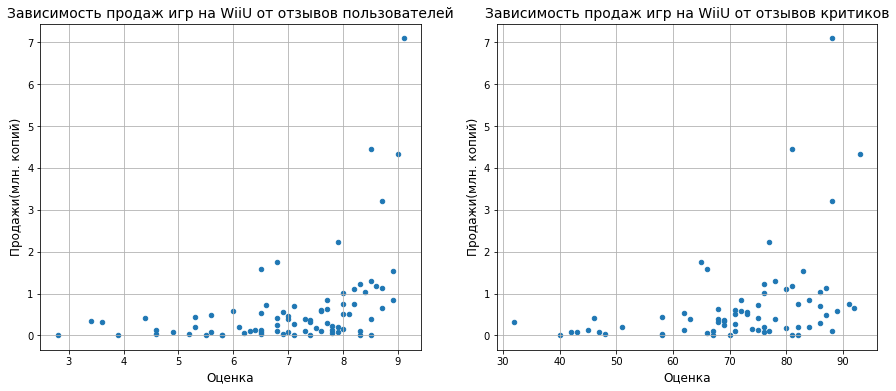

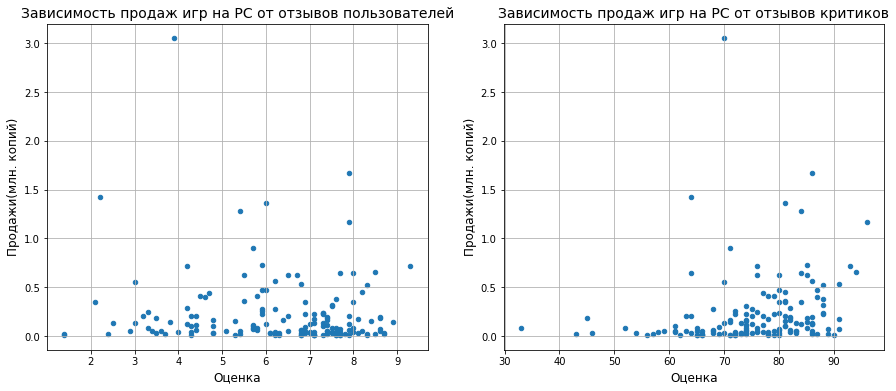

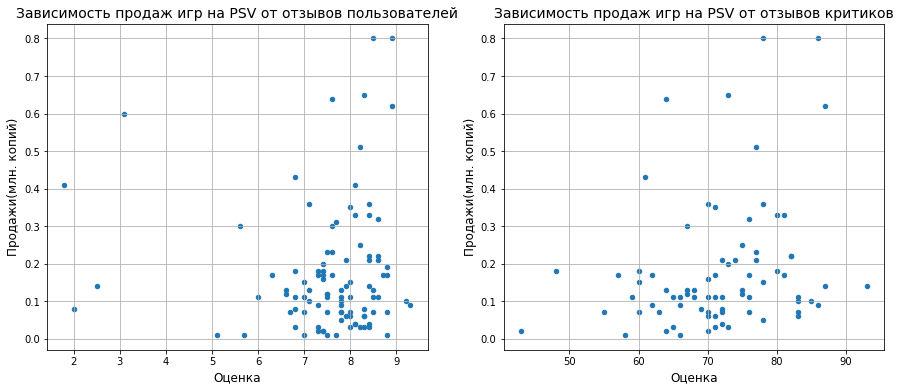

In [42]:
for platform in df[df['platform'] != 'PS4']['platform'].unique():
    fig, axes = plt.subplots(1,2,figsize=(15,6))

    df.query('platform == @platform').plot(x='user_score', y='total_sales', kind='scatter', grid=True, ax=axes[0])
    df.query('platform == @platform').plot(x='critic_score', y='total_sales', kind='scatter', grid=True, ax=axes[1])
    axes[0].set_title(f'Зависимость продаж игр на {platform} от отзывов пользователей', fontsize=14)
    axes[0].set_xlabel('Оценка', fontsize=12)
    axes[0].set_ylabel('Продажи(млн. копий)', fontsize=12)
    axes[1].set_title(f'Зависимость продаж игр на {platform} от отзывов критиков', fontsize=14)
    axes[1].set_xlabel('Оценка', fontsize=12)
    axes[1].set_ylabel('Продажи(млн. копий)', fontsize=12);
   

Для вычисления коэффициентов корелляции создадим два пустых датасета с отзывами пользователей и отзывами критиков в которых соберем все показатели, затем объединим их в один и сравним.

In [43]:
df_stat_user_score = pd.DataFrame({'type_score': ['user_score']})
df_stat_critic_score = pd.DataFrame({'type_score': ['critic_score']})

In [44]:
for platform in df['platform'].unique():
    data = df.query('platform == @platform')
    df_stat_user_score[platform] = data['user_score'].corr(data['total_sales'])
    df_stat_critic_score[platform] = data['critic_score'].corr(data['total_sales'])   

In [45]:
df_stat_user_score

,type_score,PS4,3DS,XOne,WiiU,PC,PSV
0,user_score,-0.031957,0.241504,-0.068925,0.41933,-0.093842,0.000942


In [46]:
df_stat_critic_score

,type_score,PS4,3DS,XOne,WiiU,PC,PSV
0,critic_score,0.406568,0.357057,0.416998,0.376415,0.19603,0.254742


Объединим полученные датасеты `df_stat_user_score` и `df_stat_critic_score` в один датасет с помощью `append()`. Транспонируем и выведем полученную таблицу.

In [47]:
df_stat_score = df_stat_user_score.append(df_stat_critic_score, ignore_index=True)
pd.options.display.float_format ='{:.2f}'.format # округлим все значения до целых чисел
df_stat_score.T

,0,1
type_score,user_score,critic_score
PS4,-0.03,0.41
3DS,0.24,0.36
XOne,-0.07,0.42
WiiU,0.42,0.38
PC,-0.09,0.20
PSV,0.00,0.25


По графикам и полученной нами таблице видим несильные положительные взаимосвязи продаж от оценок критиков около 0,2 - 0.4 у платформ PC, XOne, PSV как и в случае с моделью PS4. Зависимость продаж от оценок пользователей на этих платформах практически отсутствует. Покупатели игр на этих платформах полагаются на более профессиональную оценку игр и делают выбор.  
На платформах 3DS и WiiU положительная взаимосвязь с коэффициентом корреляции в пределах 0.2-0.4 присутствует как относительно оценок критиков так и оценок пользователей.  

Посмотрим на общее распределение игр по жанрам. Для этого сгруппируем датасет с помощью groupby() по жанрам и с помощью метода agg() посчитаем сумму продаж. Датасет сразу же отсортируем по возрастанию суммы продаж. Построим столбчатую диаграмму с помощью plot и посмотрим распределение продаж по жанрам.

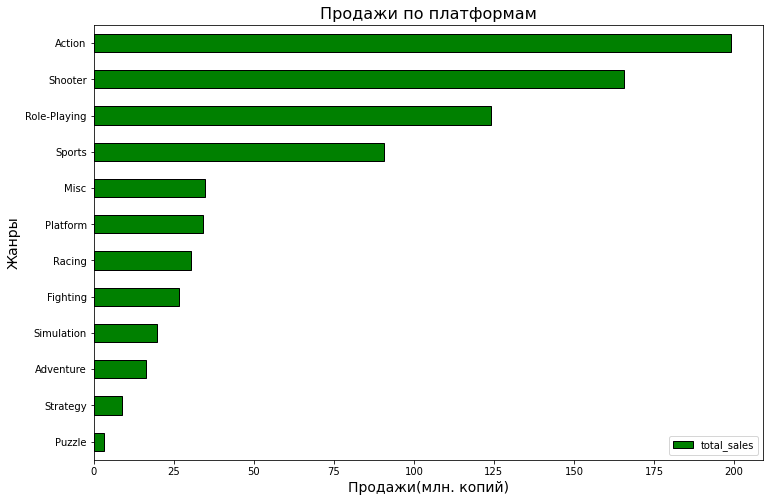

In [48]:
df.groupby('genre', as_index=False).agg({'total_sales': 'sum'}).\
sort_values(by='total_sales').plot(x='genre', y='total_sales', kind='barh', figsize=(12, 8), color='g', ec='k')
plt.title('Продажи по платформам', fontsize=16)
plt.xlabel('Продажи(млн. копий)', fontsize=14)   
plt.ylabel('Жанры', fontsize=14);

Для более точных выводов дополнительно посмотрим распределение игр по жанрам в зависимости от медианных продаж. Этот показатель покажет жанры, где игры дают более стабильный доход.

Для этого сгруппируем датасет с помощью groupby() по жанрам и с помощью метода agg() посчитаем медиану продаж. Датасет сразу же отсортируем по возрастанию суммы продаж. Построим столбчатую диаграмму с помощью plot и посмотрим распределение продаж по жанрам.

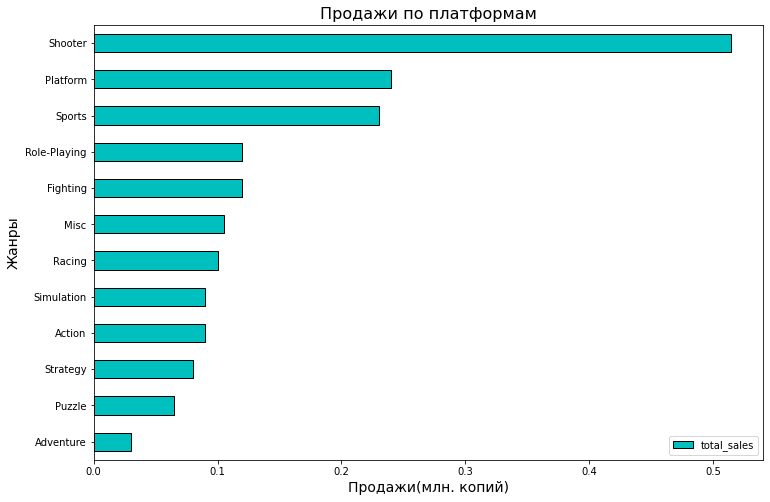

In [49]:
df.groupby('genre', as_index=False).agg({'total_sales': 'median'}).\
sort_values(by='total_sales').plot(x='genre', y='total_sales', kind='barh', figsize=(12, 8), color='c', ec='k')
plt.title('Продажи по платформам', fontsize=16)
plt.xlabel('Продажи(млн. копий)', fontsize=14)   
plt.ylabel('Жанры', fontsize=14);

Первое место с приличным отрывом занимает жанр Shooter. На втором месте жанр Platform. Практически рядом жанр Sports. Это самые популярные жанры в игровой индустрии. Их больше выбирает именно молодежь, которая составляет абсолютное большинство среди игроков. 
Жанры Adventure и Strategy напротив показывают очень низкие продажи. Несмотря на достаточно интересные игры в этом жанре ими увлекается узкий круг аудитории.

**Вывод**

Мы провели анализ данных с 2013 по 2016гг.
В этот период времени происходит обновление поколений платформ PlayStation, XBox. Новые поколения PS4 и XBox One растут в продажах, старые PS3 и XBOx360 постепенно падают.
Заметную долю на рынке занимают продажи игр на платформе 3DS от компании Nintendo, но показывают постепенное падение со временем.

Наибольшие медианные продажи у платформ PS4, XONe, WiiU. Почти у всех платформ много выбросов в распределении продаж игр, значит присутствует много игр с выбивающимся количеством продаж, т.е. игр-хитов.

Исследование показало несильные положительные взаимосвязи продаж от оценок критиков около 0,2 - 0.4 у платформ PC, XOne, PSV как и в случае с моделью PS4. Зависимость продаж от оценок пользователей на этих платформах практически отсутствует. Покупатели игр на этих платформах полагаются на более профессиональную оценку игр и делают выбор.
На платформах 3DS и WiiU положительная взаимосвязь с коэффициентом корреляции в пределах 0.2-0.4 присутствует как относительно оценок критиков так и оценок пользователей.

Первое место по жанрам в продажах игр с приличным отрывом занимает жанр Shooter. Второе и третье места с практически равными долями занимают жанры Platform и Sports. Это самые популярные жанры в игровой индустрии.

## 5. Составление портрета пользователя каждого региона                <a id='intro10'></a>   

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы(топ-5) и самые популярные жанры(топ-5)

Для этого создадим функцию которая будет группировать датасет по платформам и считать сумму продаж по региону и также группировать датасет по жанрам и считать медиану продаж по региону. С помощью этих группировок будем отбирать топ-5 платформ по региону и топ-5 жанров. Затем с помощью метода `pie` будем отрисовывать графики.

In [50]:
def portrait_user(region):
    fig, axes = plt.subplots(1,2,figsize=(20,8))
    
    df.groupby('platform').\
    agg({region: 'sum'}).sort_values(by=region, ascending=False)[:5].\
    plot(kind='pie', y=region, autopct='%1.1f%%', figsize=(12,12), legend=False, ax=axes[0])
    df.groupby('genre').\
    agg({region: 'median'}).sort_values(by=region, ascending=False)[:5].\
    plot(kind='pie', y=region, autopct='%1.1f%%', figsize=(12,12), legend=False, ax=axes[1])
    axes[0].set_title('Доли продаж игр на Топ-5 платформах', fontsize=14)
    axes[1].set_title('Доли продаж игр Топ-5 жанров', fontsize=14)
    

С помощью функции посмотрим доли продаж топ-5 игровых платформ и топ-5 игровых жанров в регионе Северная Америка.

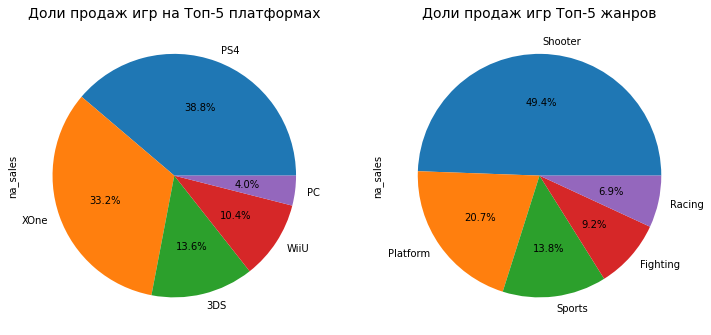

In [51]:
portrait_user('na_sales')

На графиках видим, что в Северной Америке главенствует платформа PS4. Это объясняется лучшей рекламной компанией,ценовой политикой, более развитой игровой инфраструктурой. Также немного отстав от нее, заметную долю занимает платформа XOne. Здесь местная компания Microsoft - производитель платформы XOne - проводит более лояльную ценовую политику для своих покупателей. Это вносит заметную роль в объемы продаж игр.  
Меньше всего в Америке играют в игры на платформе PC и WiiU.  
По жанрам здесь с отрывом выделяется Shooter с долей 1/2. На втором месте Platform, занимает 1/5. Здесь также как и по всему датасету лидируют молодежные жанры.

С помощью функции посмотрим доли продаж топ-5 игровых платформ и топ-5 игровых жанров в регионе Европа.

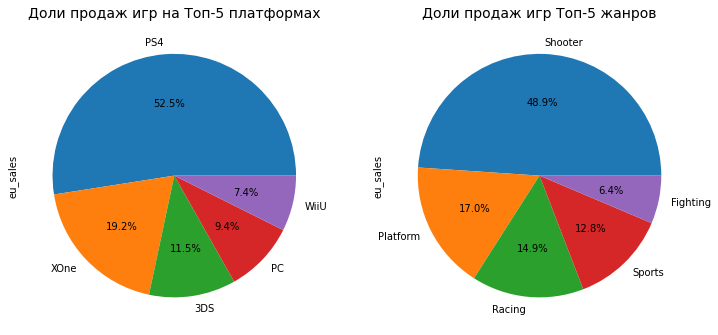

In [52]:
portrait_user('eu_sales')

По Европе видим что здесь большую часть рынка занимают продажи игр на платформе PS4.
Продажи игр на платформе XOne здесь заметно уступают. Причин несколько: это и более низкая цена платформ PS4, большее количество игр и другое.  
Как и в Америке в Европе меньше всего покупают игры на платформах PC и WiiU.  
По жанрам картина та же. Половину продаж по жанрам занимает жанр Shooter, на втором месте жанр Platform.

Наконец, с помощью функции посмотрим доли продаж топ-5 игровых платформ и топ-5 игровых жанров в регионе Япония.

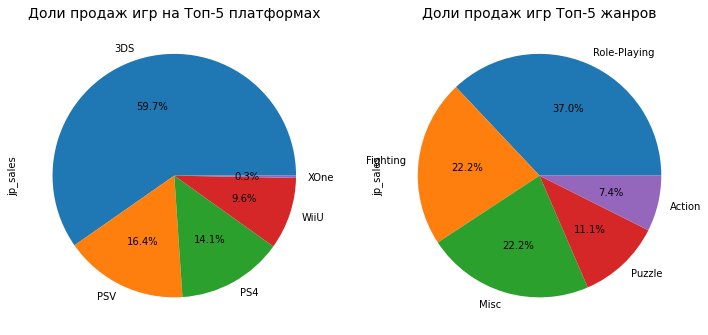

In [53]:
portrait_user('jp_sales')

В Японии по продажам игр с большим отрывом лидируют портативные консоли: 3DS от компании Nintendo и PSV от компании PlayStation, продажи игр занимают более половины рынка. 
Продажи платформы PS4 здесь достаточно низки.
Похоже в Японии люди более занятые и у них хватает времени поиграть только на портативной консоли например в дороге на работу. Продажи американской платформы XOne практически равны нулю.  
В продажах игр по жанрах тоже имееются существеные различия по сравнению с другими регионами. На первом месте здесь жанр Role-Playing, на втором Fighting.

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе. Сгруппируем датасет по рейтингу ESRB с помощью `groupby`, посчитаем суммы продаж по регионам с помощью `agg`. Нарисуем столбчатый график с помощью `plot.bar`

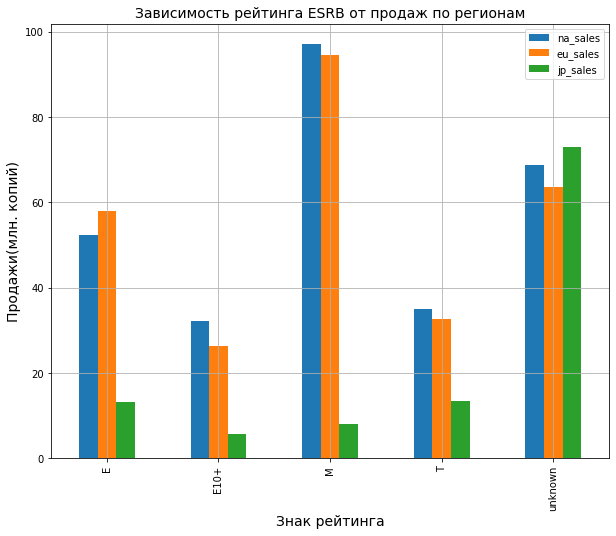

In [54]:
df.groupby('rating').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}).plot.bar(grid=True, figsize=(10, 8))
plt.title('Зависимость рейтинга ESRB от продаж по регионам', fontsize=14)
plt.xlabel('Знак рейтинга', fontsize=14)   
plt.ylabel('Продажи(млн. копий)', fontsize=14);



На графике видим, что по Северной Америке лучше всего продаются игры с рейтингом M(для взрослых). На втором месте игры рейтинга E(для всех). Несмотря на то что игры для взрослых из за ряда сцен нежелательны для младшей аудитории, молодежь во многом выбирает в том числе игры из этой категории как раз из за этих сцен.  
По Европе видим ту же корреляцию что и по Америке. Лучше всего продаются игры с взрослым рейтингом, на втором месте игры для всех.  
По Японии уже данные отличаются. Здесь преобладают доли игр для всех(E) и доли для подростов(T), они примерно равны. Япония гораздо более консервативна чем Европа или Америка, поэтому и продажи игр по рейтингу ESRB здесь распределены по другому.

**Вывод**

Типичный портрет пользователя из Северной Америки:
- предпочитает игры на платформах PS4, XOne
- любит игровые жанры Shooter и Platform
- больше выбирает игры с рейтингом M(для взрослых)

Типичный портрет пользователя из Европы:
- предпочитает игры на платформе PS4
- любит игровые жанры Shooter и Platform
- больше выбирает игры с рейтингом M(для взрослых)

Типичный портрет пользователя из Японии:
- предпочитает игры на консольных платформах 3DS и PSV
- любит игровые жанры Role-Playing и Fighting
- больше выбирает игры с рейтингом E(для всех) и T(для подростков)

## 6. Проверка гипотез                                                                            <a id='intro11'></a>   

1. Проверим гипотезу что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Создадим срезы данных с платформами XBox One и PC.

In [55]:
df_x_one = df.query('platform == "XOne" & user_score >= 0')
df_pc = df.query('platform == "PC" & user_score >= 0')

Для того чтобы уточнить критерий проверки гипотез с помощью графиков посмотрим на распределение данных в датасете с платформой XBox One `df_xone` и датасете с платформой PC `df_pc`

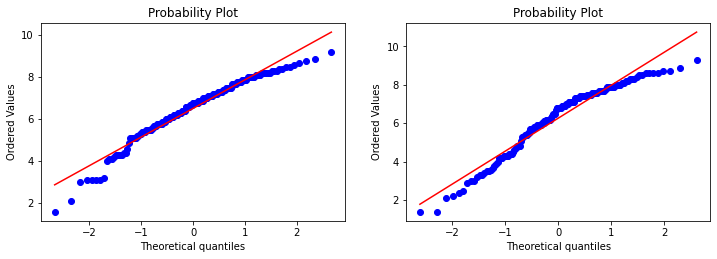

In [56]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(df_x_one['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(df_pc['user_score'], dist="norm", plot=plt);

Графики показывают ненормальное распределение и на первый взгляд нам не подходит параметрический критерий Стьюдента. Но согласно ЦПТ, если в выборке много наблюдений, распределение будет стремится к нормальному. Значит мы можем использовать критерий Стьюдента. 

<p>Введем основную и альтернативные гипотезы:</p>

H₀ сформулируем так, чтобы использовать знак равенства. Другими словами, чтобы все данные лежали в районе изначально предполагаемого значения.Исходя из H₀ сформулируем альтернативную гипотезу H₁. Это утверждение, которое принимается верным, если отбрасывается H₀.


$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги платформ Xbox One и PC равны}\\
   H_1 :\text{Средние пользовательские рейтинги платформ Xbox One и PC не равны}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем `p-value`, используя `ttest` из библиотеки `scipy` для сравнения средних двух выборок.

Если `p-value` будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

Применим метод `ttest_ind` к рейтингам платформ `Xbox One` и `PC` для независимых выборок.

In [57]:
results = st.ttest_ind(df_x_one['user_score'], df_pc['user_score'], equal_var=False)
print('p-значение: ', results.pvalue)
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергаем гипотезу


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.14759702913383088
Не получилось отвергнуть нулевую гипотезу


In [58]:
print(f'Средний пользовательский рейтинг платформы XBox One: {df_x_one.user_score.mean()}')
print(f'Средний пользовательский рейтинг платформы PC: {df_pc.user_score.mean()}')

Средний пользовательский рейтинг платформы XBox One: 6.521427154541016
Средний пользовательский рейтинг платформы PC: 6.269676208496094


Итак, `p-value` получилось больше выбранного уровня $\alpha = 0.05$. Данные не позволили нам отвергнуть нулевую гипотезу - cредние пользовательские рейтинги платформ Xbox One и PC равны.

2. Проверим гипотезу что средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.

Создадим срезы данных с жанрами Action и Sports.

In [59]:
df_action = df.query('genre == "Action" & user_score >= 0')
df_sports = df.query('genre == "Sports" & user_score >= 0')

Для того чтобы уточнить критерий проверки гипотез с помощью графиков посмотрим на распределение данных в датасете с жанром Action `df_action` и датасете с жанром Sports `df_sports`

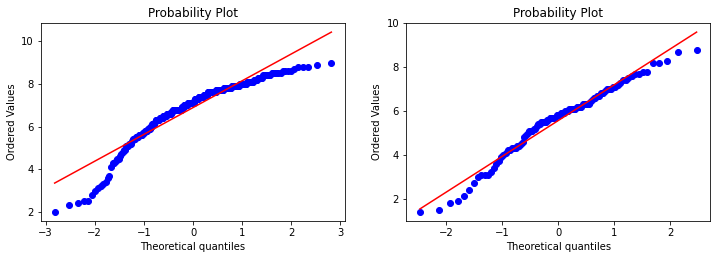

In [60]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(df_action['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(df_sports['user_score'], dist="norm", plot=plt);

Графики показывают ненормальное распределение и на первый взгляд нам не подходит параметрический критерий Стьюдента. Но согласно ЦПТ, если в выборке много наблюдений, распределение будет стремится к нормальному. Значит мы можем использовать критерий Стьюдента. 

<p>Введем основную и альтернативные гипотезы:</p>

H₀ сформулируем так, чтобы использовать знак равенства. Другими словами, чтобы все данные лежали в районе изначально предполагаемого значения.Исходя из H₀ сформулируем альтернативную гипотезу H₁. Это утверждение, которое принимается верным, если отбрасывается H₀.


$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Action и Sports равны}\\
   H_1 :\text{Средние пользовательские рейтинги жанров Action и Sports разные}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем `p-value`, используя `ttest` из библиотеки `scipy` для сравнения средних двух выборок.

Если `p-value` будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

Применим метод `ttest_ind` к рейтингам жанров Action `df_action` и Sports `df_sports` для независимых выборок.

In [61]:
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var=False)
print('p-значение: ', results.pvalue)
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергаем гипотезу


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.2678146030439382e-11
Отвергаем нулевую гипотезу


In [62]:
print(f'Средний пользовательский рейтинг жанра Action: {df_action.user_score.mean()}')
print(f'Средний пользовательский рейтинг жанра Sports: {df_sports.user_score.mean()}')

Средний пользовательский рейтинг жанра Action: 6.890880107879639
Средний пользовательский рейтинг жанра Sports: 5.565345764160156


Итак, `p-value` получилось меньше выбранного уровня $\alpha = 0.05$. Отвергаем нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports равны.

**Вывод**

Мы проверили две гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC равны. 
Данные не позволили нам отвергнуть нулевую гипотезу, т.к. `p-value` получилось больше выбранного уровня $\alpha = 0.05$.
- Средние пользовательские рейтинги жанров Action и Sports равны
Отвергаем нулевую гипотезу, т.к. p-value получилось меньше выбранного уровня  $\alpha = 0.05$.

## 7. Общий вывод                                                                            <a id='intro12'></a>   

На основе исторических данных о продажах игр, оценок пользователей и экспертов, жанров и платформ мы провели анализ данных за период 2013-2016гг.
В целом по всему миру лучше всего игры продаются на платформах PlayStation, XBox и Nintendo. В этом период происходит обновление линеек PS и XBox, платформы PS4 и XOne выходят в 2013 году и показывают хорошие продажи, также все еще не теряют актуальности платформы 3DS, PC, PSV, WiiU.  
Проведенный на платформах 3DS, PC, PSV, WiiU, PS4 и XOne анализ показал:
- наибольшие медианы продаж игр у трех платформ: PS4, WiiU, XOne, они практически равны
- средние положительные взаимосвязи продаж игр от оценок критиков у платформ PC, XOne, PSV, PS4. Зависимость продаж от оценок пользователей на этих платформах практически отсутствует. На платформах 3DS и WiiU слабая положительная взаимосвязь присутствует как относительно оценок критиков так и оценок пользователей
- максимальные продажи у молодежных жанров Shooter, Platform и Sports.

Если посмотреть зависимости в разбивке по регионам то:
1) пользователь из Северной Америки предпочитает игры на платформах PS4 и XOne, любит игровые жанры Shooter и Platform, больше выбирает игры с рейтингом M(для взрослых)  
2) пользователь из Европы предпочитает игры на платформе PS4, любит игровые жанры Shooter и Platform, больше выбирает игры с рейтингом M(для взрослых)  
3) пользователь из Японии предпочитает игры на консольных платформах 3DS и PSV, любит игровые жанры Role-Playing и Fighting, больше выбирает игры с рейтингом E(для всех) и T(для подростков)

Таким образом, магазину при планировании рекламных кампаний нужно учитывать выявленные закономерности.